In [61]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.linear_model import LogisticRegression, LinearRegression

from sklearn.datasets import make_classification

from sklearn.metrics import accuracy_score, precision_score, recall_score
from statsmodels.tools import add_constant
from sklearn.model_selection import train_test_split, KFold

from src.hiv_data_pipeline import hiv_data_pipe
from IPython.display import display

import seaborn as sns
# set larger font sizes and the style
np.set_printoptions(suppress=True)
font_size = 24
mpl.rcParams.update({'font.size': font_size})
mpl.rcParams['xtick.labelsize'] = font_size-5
mpl.rcParams['ytick.labelsize'] = font_size-5
#plt.style.use('bmh')
plt.style.use('dark_background')

In [70]:
df = hiv_data_pipe()

def display_df(df, max_rows=10, max_columns=None):
    '''Display the dataframe'''    
    with pd.option_context('display.max_rows', max_rows, 'display.max_columns', max_columns):
        display(df)
                      
display_df(df)

,county_code,COUNTY,STATEABBREVIATION,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,Med_AMAT_fac,Med_MH_fac,Med_SA_fac,Med_SMAT_fac,Med_TMAT_fac,PLHIV,Population,SA_fac,SMAT_fac,TMAT_fac,drugdeathrate,drugdeathrate_est,drugdeaths,mme_percap,partD30dayrxrate,pctunins,num_SSPs,bup_phys,drugdep,pctunmetneed,nonmedpain,ADULTMEN,MSM12MTH,MSM5YEAR,%msm12month,%msm5yr,unemployment_rate,poverty_rate,household_income
0,1001,Autauga County,AL,2015,0.0,5.0,10.9,225.5,1.0,0.0,1.0,2.0,0.0,0.0,103.0,55035.0,2.0,0.0,0.0,0.0,10.1,0.0,1084.0,2.34,10.1,0.0,2.0,2.56,95.70,5.12,19410,333,514,1.715611,2.648120,8.5,12.8,20304
1,1003,Baldwin County,AL,2015,0.0,15.0,8.7,163.9,4.0,0.0,3.0,1.0,0.0,0.0,282.0,203690.0,2.0,0.0,0.0,21.1,20.1,43.0,1148.5,2.56,13.0,0.0,13.0,2.54,91.34,5.27,69724,925,1429,1.326659,2.049509,8.6,13.8,73058
2,1005,Barbour County,AL,2015,0.0,0.0,0.0,436.0,1.0,0.0,1.0,1.0,0.0,0.0,97.0,26270.0,1.0,0.0,0.0,0.0,6.1,0.0,577.6,1.46,15.5,0.0,0.0,2.54,91.34,5.27,11567,82,127,0.708913,1.097951,14.2,24.1,9145
3,1007,Bibb County,AL,2015,0.0,0.0,0.0,191.9,0.0,0.0,0.0,1.0,1.0,0.0,37.0,22561.0,1.0,1.0,0.0,0.0,14.1,0.0,563.0,0.39,9.7,0.0,0.0,2.58,91.86,5.62,9508,119,184,1.251578,1.935212,10.9,17.0,7078
4,1009,Blount County,AL,2015,0.0,5.0,10.4,95.4,1.0,0.0,1.0,1.0,0.0,0.0,46.0,57676.0,1.0,0.0,0.0,0.0,16.1,11.0,459.0,1.22,11.6,0.0,1.0,2.58,91.86,5.62,21368,601,928,2.812617,4.342943,9.3,17.3,20934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,Sweetwater County,WY,2015,0.0,0.0,0.0,86.5,3.0,0.0,3.0,5.0,1.0,0.0,31.0,44693.0,6.0,1.0,0.0,0.0,18.1,0.0,1044.8,1.59,13.5,0.0,2.0,2.08,87.02,3.38,16941,177,274,1.044803,1.617378,5.6,12.2,16687
3136,56039,Teton County,WY,2015,0.0,0.0,0.0,50.5,2.0,0.0,2.0,1.0,0.0,0.0,10.0,23073.0,1.0,0.0,0.0,0.0,8.1,0.0,387.8,1.25,16.9,0.0,2.0,2.03,89.16,3.42,9172,50,78,0.545137,0.850414,3.6,8.5,7873
3137,56041,Uinta County,WY,2015,0.0,0.0,0.0,0.0,4.0,0.0,4.0,1.0,0.0,0.0,0.0,20819.0,1.0,0.0,0.0,0.0,18.1,0.0,1067.8,2.50,14.0,0.0,2.0,2.08,87.02,3.38,7401,75,116,1.013377,1.567356,5.8,14.2,7557
3138,56043,Washakie County,WY,2015,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,8334.0,1.0,0.0,0.0,0.0,16.1,0.0,1444.0,2.11,16.9,0.0,0.0,2.09,86.12,3.26,3141,17,27,0.541229,0.859599,7.9,14.2,3461


In [63]:
df.describe()

#display_df(df.sort_values('HIVincidence', ascending=False))

,county_code,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,Med_AMAT_fac,Med_MH_fac,Med_SA_fac,...,pctunmetneed,nonmedpain,ADULTMEN,MSM12MTH,MSM5YEAR,%msm12month,%msm5yr,unemployment_rate,poverty_rate,household_income
count,3140.000000,3140.0,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,...,3139.000000,3139.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03
mean,30387.632484,2015.0,0.085669,11.879936,4.046911,145.400446,3.290127,0.058917,2.934395,2.260191,...,88.709994,4.313600,3.676915e+04,927.681210,1434.076752,1.294020,1.999905,8.552643,16.792452,3.700843e+04
std,15156.372045,0.0,0.450816,69.947292,16.575690,198.488980,8.591740,0.369298,7.401998,6.050821,...,3.226578,0.582708,1.164119e+05,4858.792046,7511.042900,1.011416,1.564130,3.746800,6.487101,1.119425e+05
min,1001.000000,2015.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,77.020000,2.950000,3.400000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.300000e+01
25%,18178.500000,2015.0,0.000000,0.000000,0.000000,32.950000,0.000000,0.000000,0.000000,0.000000,...,86.480000,3.880000,4.269000e+03,34.000000,52.000000,0.560790,0.859203,6.100000,12.100000,4.230000e+03
50%,29176.000000,2015.0,0.000000,0.000000,0.000000,89.000000,1.000000,0.000000,1.000000,1.000000,...,88.790000,4.320000,9.877500e+03,103.500000,160.000000,1.021160,1.579628,8.300000,16.000000,9.793500e+03
75%,45079.500000,2015.0,0.000000,0.000000,0.000000,183.775000,3.000000,0.000000,3.000000,2.000000,...,90.830000,4.700000,2.533775e+04,351.250000,543.000000,1.614168,2.491817,10.700000,20.300000,2.565975e+04
max,56045.000000,2015.0,8.000000,1972.000000,771.400000,2590.200000,192.000000,5.000000,133.000000,125.000000,...,100.000000,5.890000,3.666190e+06,162706.000000,251521.000000,15.166163,23.444109,29.600000,47.900000,3.242391e+06


In [47]:
# Remove some columns
cols_to_remove = ['county_code', 'COUNTY', 'STATEABBREVIATION', 'YEAR']
df.drop(columns=cols_to_remove, inplace=True)

display_df(df)

,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,Med_AMAT_fac,Med_MH_fac,Med_SA_fac,Med_SMAT_fac,Med_TMAT_fac,PLHIV,Population,SA_fac,SMAT_fac,TMAT_fac,drugdeathrate,drugdeathrate_est,drugdeaths,mme_percap,partD30dayrxrate,pctunins,num_SSPs,bup_phys,drugdep,pctunmetneed,nonmedpain,ADULTMEN,MSM12MTH,MSM5YEAR,%msm12month,%msm5yr,unemployment_rate,poverty_rate,household_income
0,0.0,5.0,10.9,225.5,1.0,0.0,1.0,2.0,0.0,0.0,103.0,55035.0,2.0,0.0,0.0,0.0,10.1,0.0,1084.0,2.34,10.1,0.0,2.0,2.56,95.70,5.12,19410,333,514,1.715611,2.648120,8.5,12.8,20304
1,0.0,15.0,8.7,163.9,4.0,0.0,3.0,1.0,0.0,0.0,282.0,203690.0,2.0,0.0,0.0,21.1,20.1,43.0,1148.5,2.56,13.0,0.0,13.0,2.54,91.34,5.27,69724,925,1429,1.326659,2.049509,8.6,13.8,73058
2,0.0,0.0,0.0,436.0,1.0,0.0,1.0,1.0,0.0,0.0,97.0,26270.0,1.0,0.0,0.0,0.0,6.1,0.0,577.6,1.46,15.5,0.0,0.0,2.54,91.34,5.27,11567,82,127,0.708913,1.097951,14.2,24.1,9145
3,0.0,0.0,0.0,191.9,0.0,0.0,0.0,1.0,1.0,0.0,37.0,22561.0,1.0,1.0,0.0,0.0,14.1,0.0,563.0,0.39,9.7,0.0,0.0,2.58,91.86,5.62,9508,119,184,1.251578,1.935212,10.9,17.0,7078
4,0.0,5.0,10.4,95.4,1.0,0.0,1.0,1.0,0.0,0.0,46.0,57676.0,1.0,0.0,0.0,0.0,16.1,11.0,459.0,1.22,11.6,0.0,1.0,2.58,91.86,5.62,21368,601,928,2.812617,4.342943,9.3,17.3,20934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,0.0,0.0,0.0,86.5,3.0,0.0,3.0,5.0,1.0,0.0,31.0,44693.0,6.0,1.0,0.0,0.0,18.1,0.0,1044.8,1.59,13.5,0.0,2.0,2.08,87.02,3.38,16941,177,274,1.044803,1.617378,5.6,12.2,16687
3136,0.0,0.0,0.0,50.5,2.0,0.0,2.0,1.0,0.0,0.0,10.0,23073.0,1.0,0.0,0.0,0.0,8.1,0.0,387.8,1.25,16.9,0.0,2.0,2.03,89.16,3.42,9172,50,78,0.545137,0.850414,3.6,8.5,7873
3137,0.0,0.0,0.0,0.0,4.0,0.0,4.0,1.0,0.0,0.0,0.0,20819.0,1.0,0.0,0.0,0.0,18.1,0.0,1067.8,2.50,14.0,0.0,2.0,2.08,87.02,3.38,7401,75,116,1.013377,1.567356,5.8,14.2,7557
3138,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,8334.0,1.0,0.0,0.0,0.0,16.1,0.0,1444.0,2.11,16.9,0.0,0.0,2.09,86.12,3.26,3141,17,27,0.541229,0.859599,7.9,14.2,3461


In [69]:
# Get X, y for the model

def get_X_y(df):    
    X = df.copy()
    target_col = 'HIVincidence'
    y = X.pop(target_col)
    return X, y

def remove_outliers(df):
    index_to_remove = df[ df['HIVincidence'] >= 700 ].index
    df.drop(index_to_remove, inplace=True)

    
#remove_outliers(df)

X, y = get_X_y(df)



#display_df(X)
display_df(y.sort_values(ascending=False))

2938    118.9
5        90.7
445      76.2
1147     75.9
403      69.9
        ...  
1972      0.0
1970      0.0
1965      0.0
1964      0.0
1570      0.0
Name: HIVincidence, Length: 3139, dtype: float64

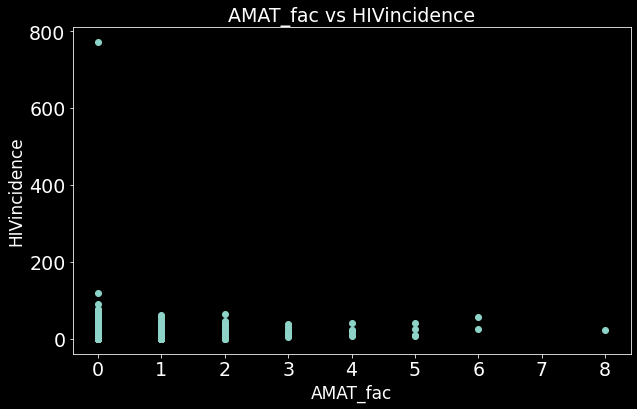

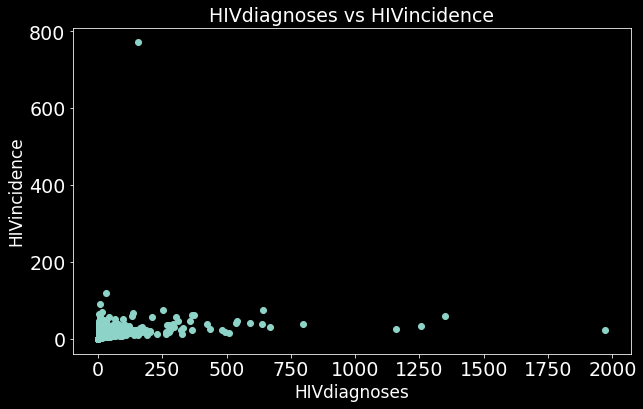

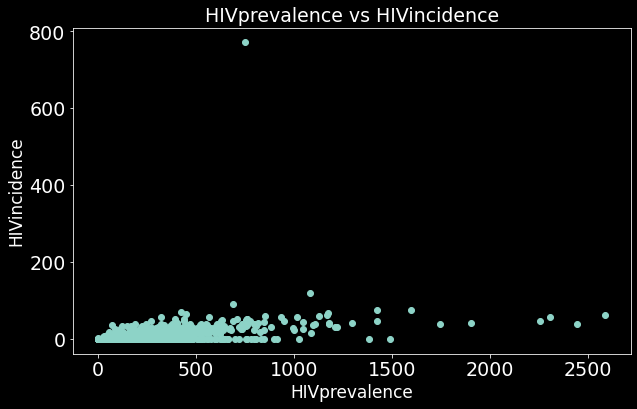

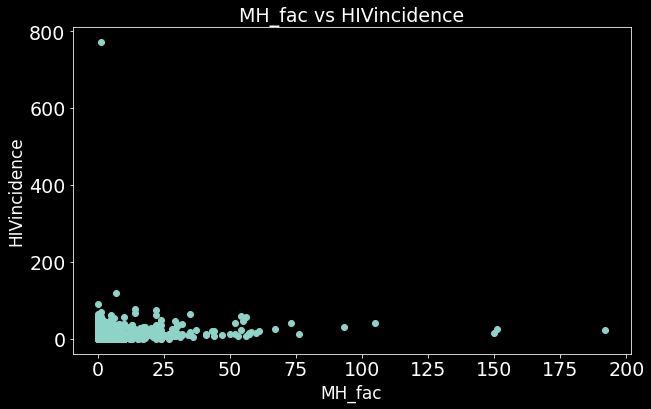

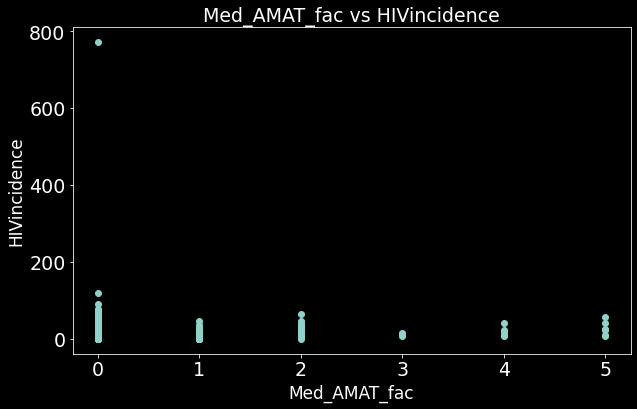

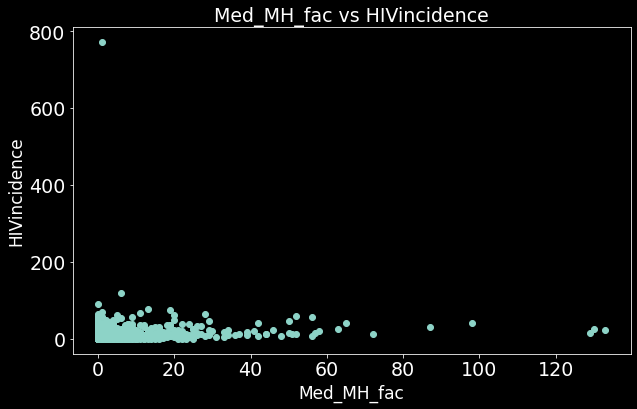

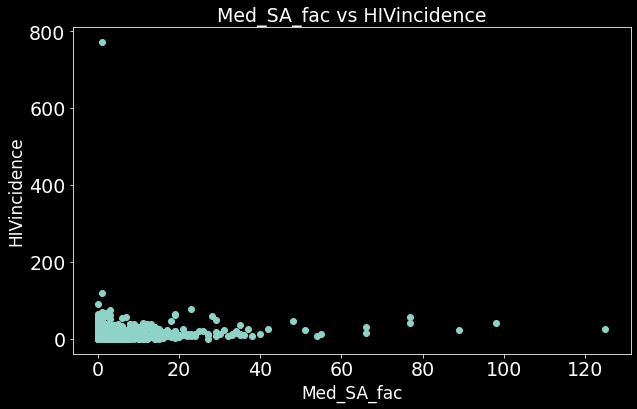

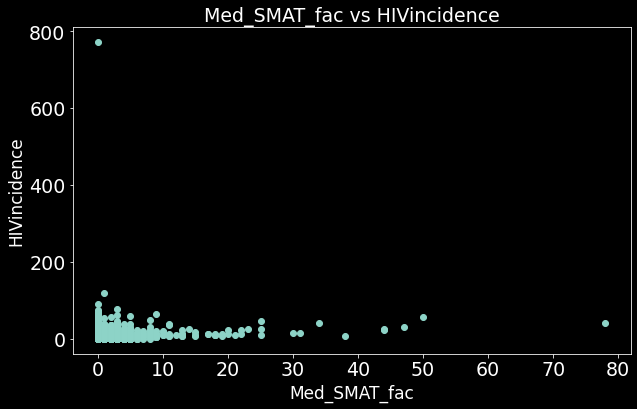

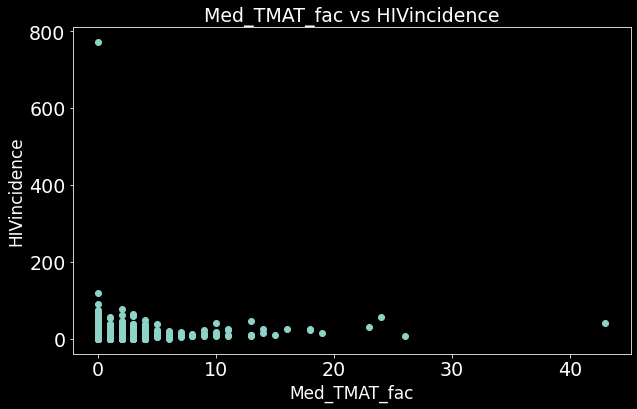

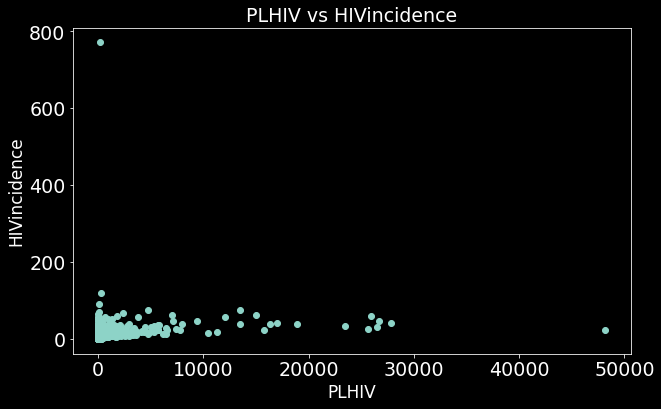

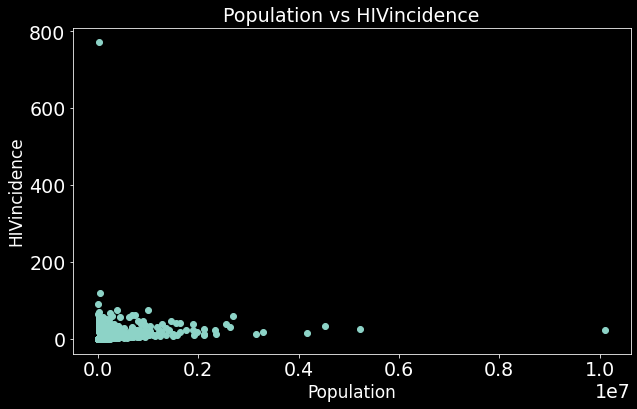

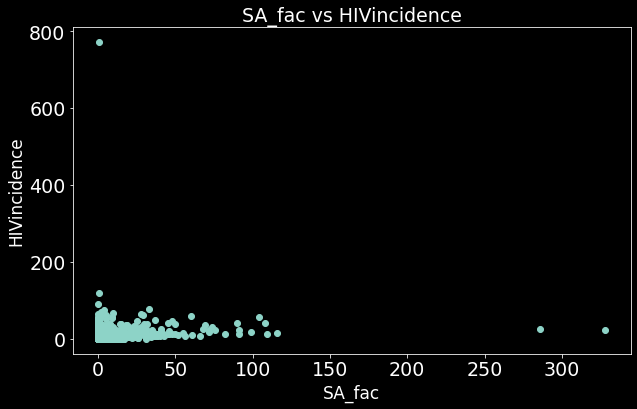

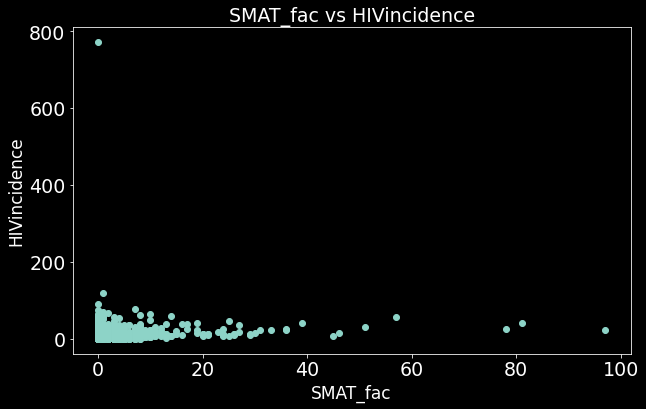

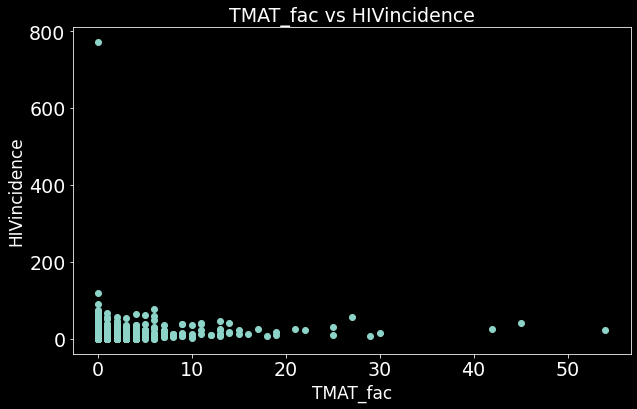

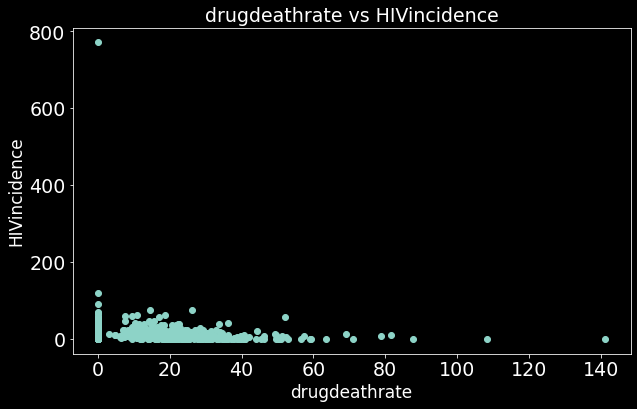

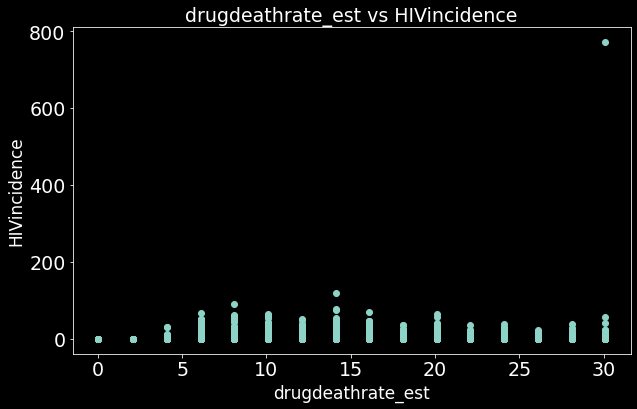

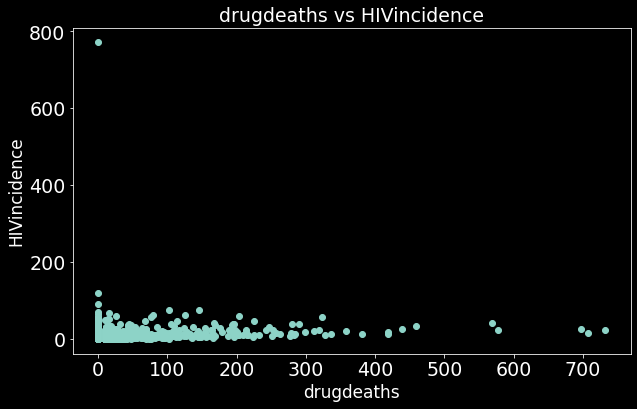

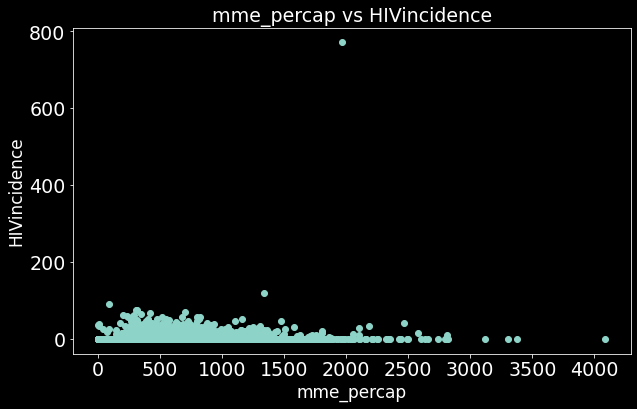

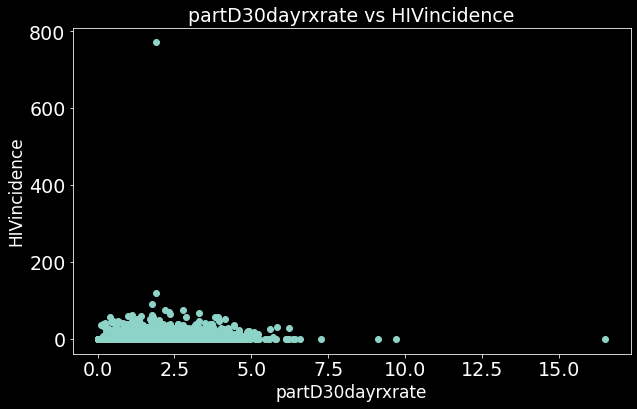

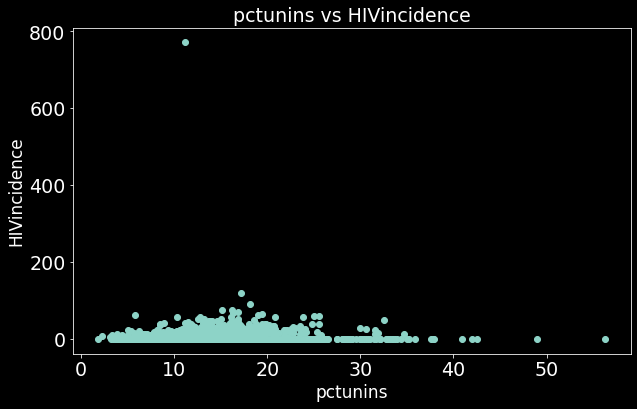

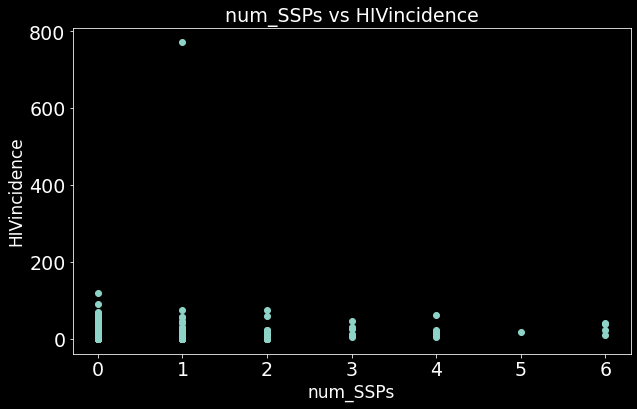

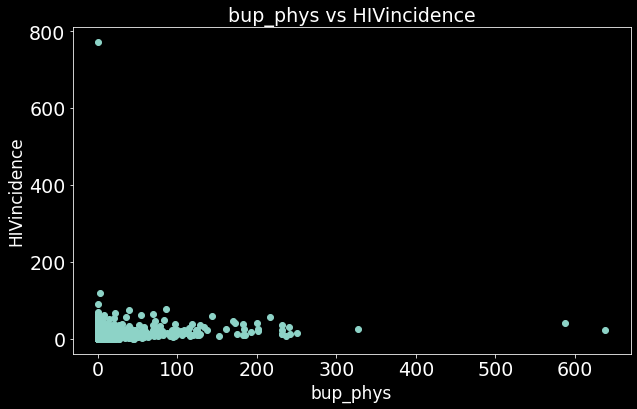

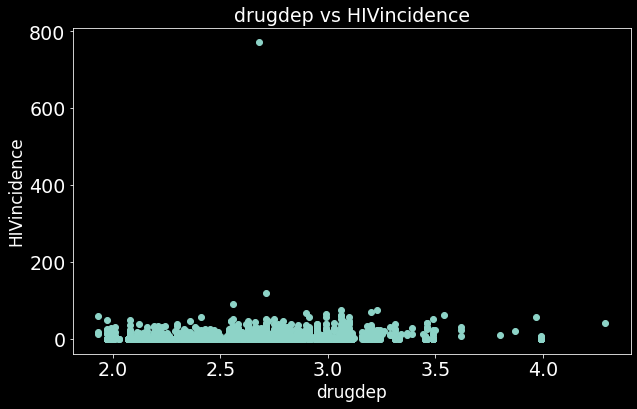

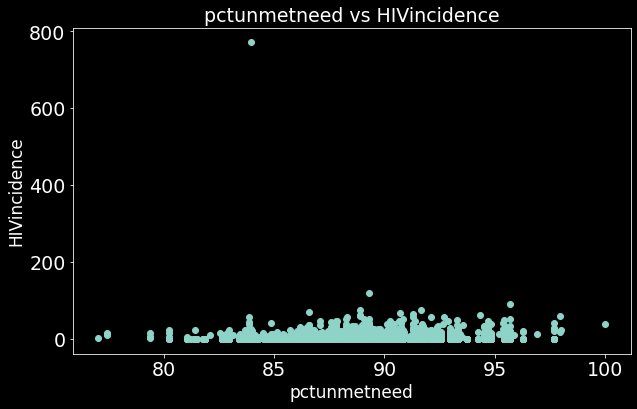

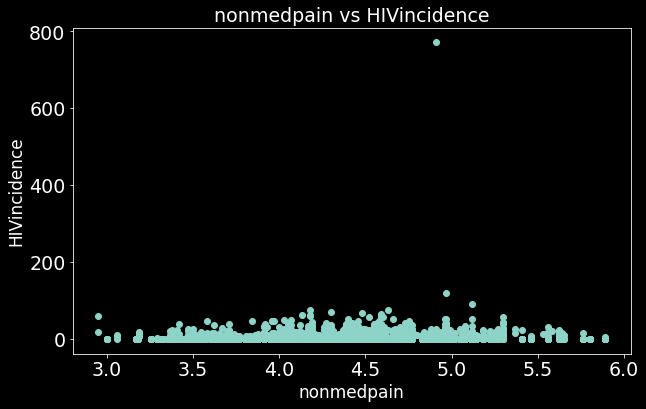

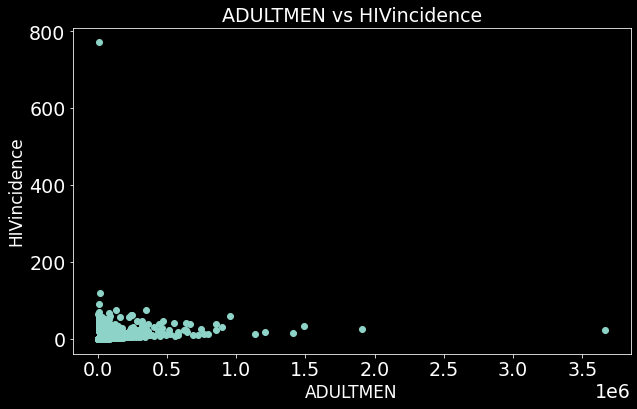

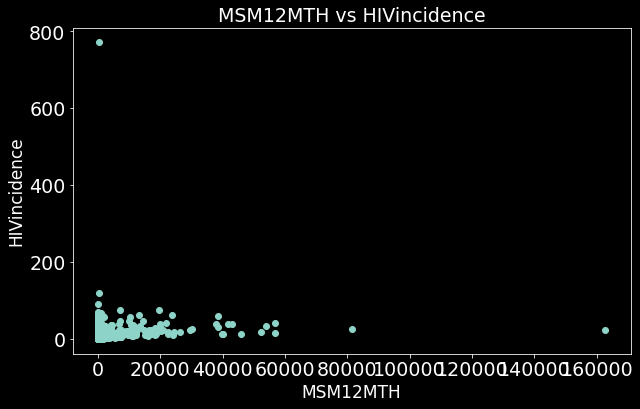

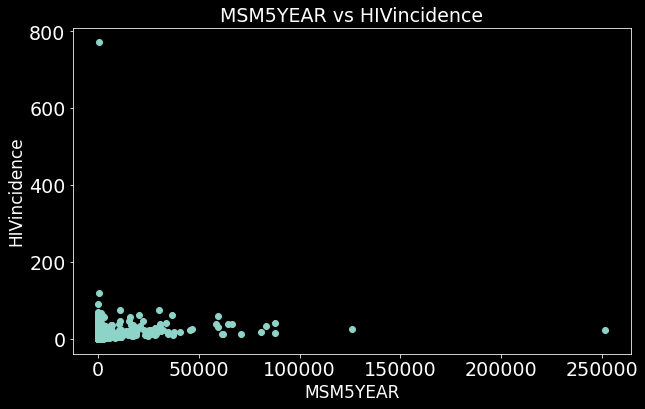

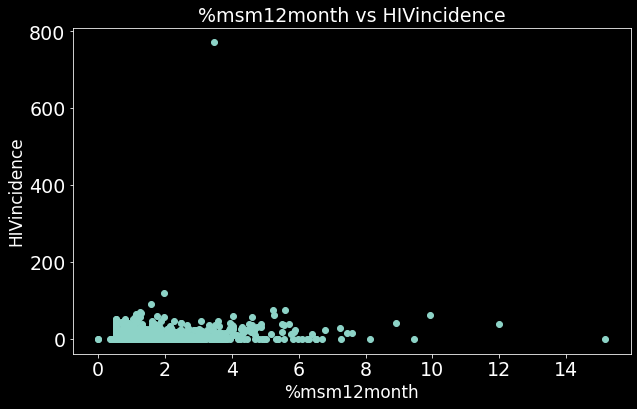

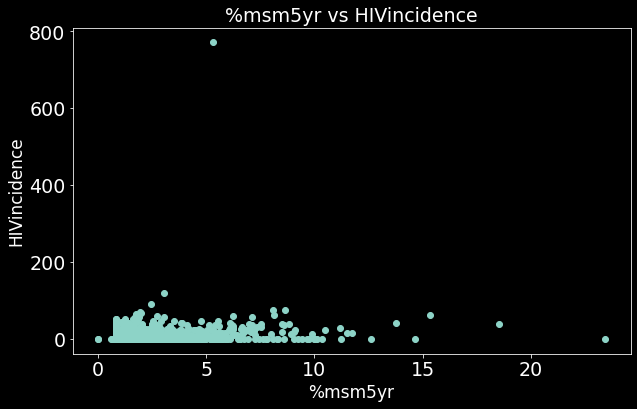

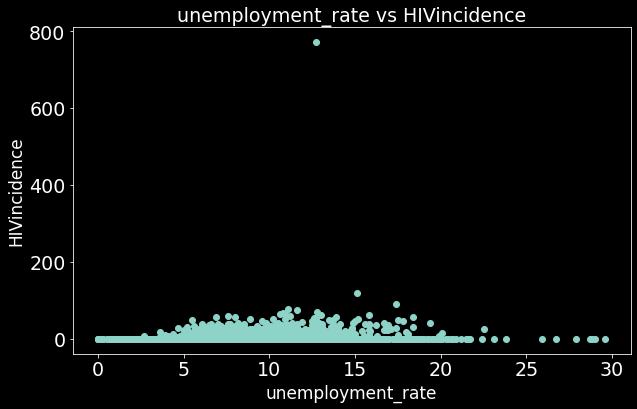

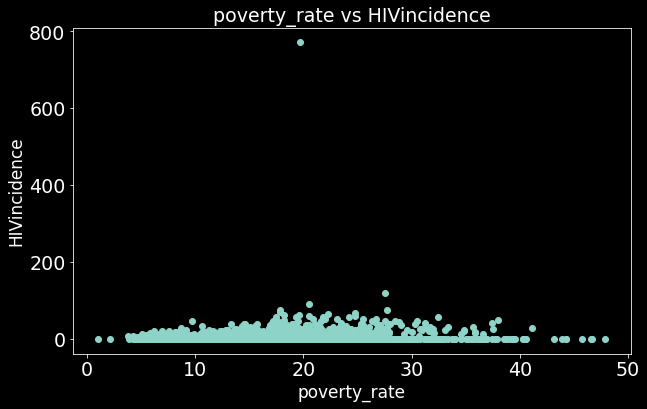

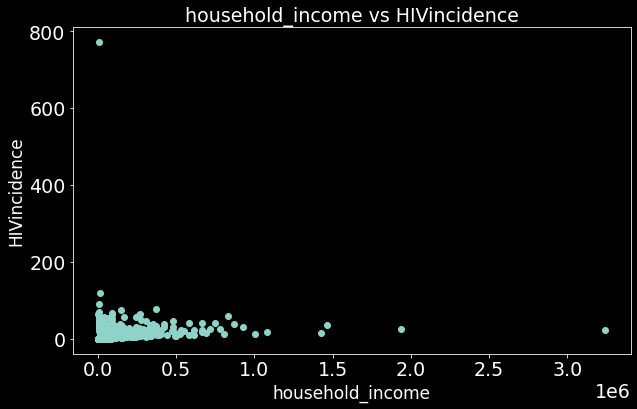

In [27]:
#sns.pairplot(df.iloc[:1000,:])

# TODO line showing correlation
def create_scatter_plot(x_values, y_values, x_label, y_label, title, filename, display=True):
    '''Either shows or saves a scatterplot'''
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
    ax.scatter(x_values, y_values)
    ax.set_title(title, fontsize=19)
    ax.set_xlabel(x_label, fontsize=17)
    ax.set_ylabel(y_label, fontsize=17)
    
    if display:
        plt.show()
    else:
        plt.savefig(f'../images/{filename}.png')  
    plt.close()
    
    
cols = X.columns
for col in cols:
    title = col + ' vs ' + y.name
    filename = 'scatter_'+ col + '_vs_' + y.name
    create_scatter_plot(x_values=X[col],
                     y_values=y,
                     x_label=col,
                     y_label=y.name,
                     title=title,
                     filename=filename,
                     display=True)

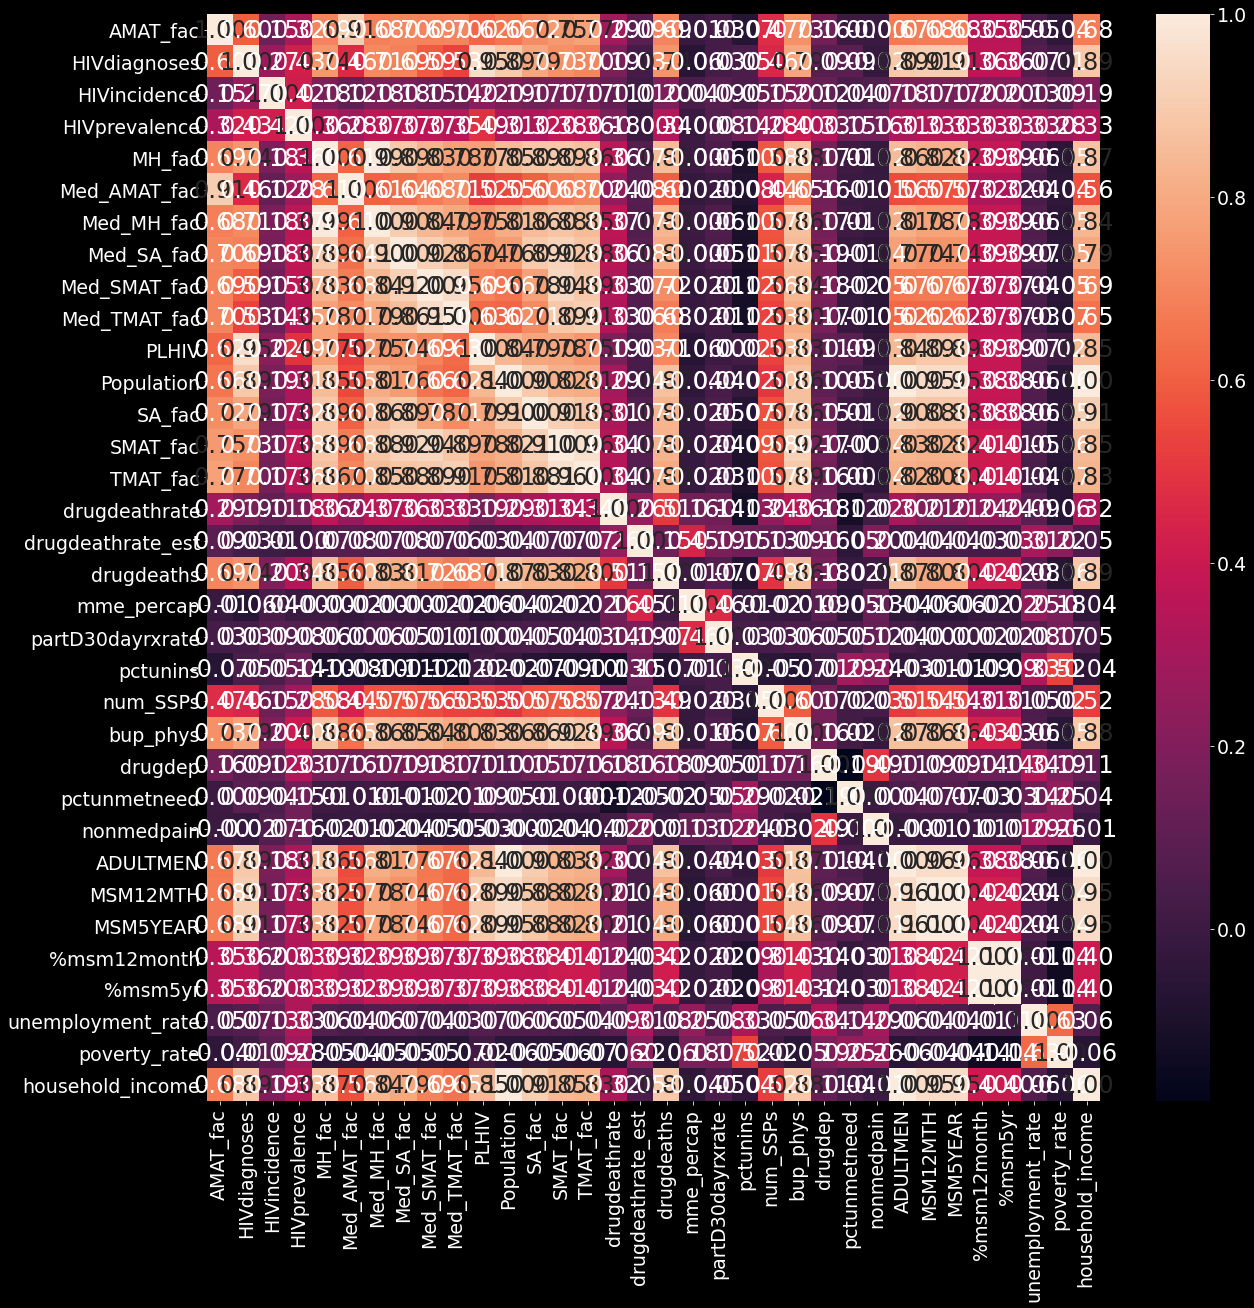

In [33]:
def draw_corr_heatmap(df):
    font_size = 24
    mpl.rcParams.update({'font.size': font_size})
    mpl.rcParams['xtick.labelsize'] = font_size-5
    mpl.rcParams['ytick.labelsize'] = font_size-5
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,20))
    sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax);

In [29]:
def plot_model(X, y, label='Residual Plot'):
    '''Taken from predictive-linear-regression/predictive-lr-solutions.ipynb'''
    model = sm.OLS(y, X).fit()
    student_resids = model.outlier_test()['student_resid']
    y_hats = model.predict(X)

    plt.scatter(y_hats, student_resids, alpha = .35, label=label)
    plt.legend()
    plt.show()